## Exercise 1

### Exercise 1.1

In [69]:
library(ggplot2)
library(openxlsx)
library(tidyverse)
library(table1)
library(dplyr)
library(rvest)
library(htmltools)


table_1 <- read.xlsx("./0_dataset_raw/table_s1.xlsx", sheet = "Clinical_information")

#Cleaning the database
names(table_1) <- str_to_lower(names(table_1))
table_1[table_1 == "/"] <- NA
table_1$proteomics <- as.factor(table_1$proteomics)
table_1$group.d <- as.factor(table_1$group.d)
table_1$sex.g <- as.factor(table_1$sex.g)
table_1$`covid-19.patients.corhort` <- as.factor(table_1$`covid-19.patients.corhort`)
table_1$`crp.i,.mg/l`<- as.numeric(table_1$`crp.i,.mg/l`)
table_1$bmi.h<- as.numeric(table_1$bmi.h)
table_1$discharge.date <-  as.Date(table_1$discharge.date, origin = "1899-12-30")
table_1$sampling.date.for.metabolomics <- as.Date(table_1$sampling.date.for.metabolomics, origin = "1899-12-30")
table_1$sampling.date.for.proteomics <-  as.Date(as.numeric(table_1$sampling.date.for.proteomics), origin= "1899-12-30")
table_1$test.date <-  as.Date(as.numeric(table_1$test.date), origin= "1899-12-30")
table_1$admission.date <-  as.Date(table_1$admission.date, origin= "1899-12-30")
table_1$onset.date.f <- as.Date(table_1$onset.date.f, origin = "1899-12-30")
table_1$date.of.progression.to.severe.state <-  as.Date(as.numeric(table_1$date.of.progression.to.severe.state), origin= "1899-12-30")

table_1$group.d <- factor(
  table_1$group.d,
  levels = c("0", "1", "2", "3"),
  labels = c("Healthy Control", "Non-COVID-19", "Non-Severe", "Severe"))

table_1$sex.g <- factor(
  table_1$sex.g,
  levels = c("1", "0"),
  labels = c("Male", "Female")
)

table_1$proteomics <- factor(
  table_1$proteomics,
  levels = c("No", "Yes"),
  labels = c("no proteomics", "proteomics available")
)



names(table_1) <- make.unique(names(table_1))

table_1 <- table_1 %>% mutate(
  time_from_onset_to_admission_days = admission.date - onset.date.f
)

table_1 <- table_1 %>% mutate(
  time_from_admission_to_severe_days = date.of.progression.to.severe.state - admission.date
)

table_1$time_from_onset_to_admission_days <- as.numeric(
  table_1$time_from_onset_to_admission_days)

table_1$time_from_admission_to_severe_days <- as.numeric(
  table_1$time_from_admission_to_severe_days
)



#Making a Total COVID group

table_1_total <- table_1 %>%
  filter(`group.d` %in% c("Non-Severe", "Severe")) %>%
  mutate(`group.d` = "Total")

table_1_expanded <- bind_rows(table_1, table_1_total)

table_1_expanded$group.d <- factor(
  table_1_expanded$group.d,
  levels = c(
    "Healthy Control",
    "Non-COVID-19",
    "Total",
    "Non-Severe",
    "Severe"
  )
)


#Labeling the variables for the table
label(table_1_expanded$sex.g) <- "Sex-no.(%)"
label(table_1_expanded$`age.(year)`) <- "Age- year"
label(table_1_expanded$bmi.h) <- "BMI, kg/m²"
label(table_1_expanded$time_from_onset_to_admission_days) <- "Time from Onset to Admission, Days"
label(table_1_expanded$time_from_admission_to_severe_days) <- "Time from Admission to Severe, Days"

#Table Creation
my.render.cont <- function(x) {
  with(stats.apply.rounding(stats.default(x)), {
    out <- c("",
             "Mean ± SD" = sprintf("%s ± %s", MEAN, SD),
             "Median (IQR)" = sprintf("%s (%s–%s)", MEDIAN, Q1, Q3),
             "Range" = sprintf("%s–%s", MIN, MAX))
    out[names(out) != "Missing"]
  })
}

my.render.cat <- function(x) {
  c("", sapply(levels(x), function(lv) {
    n <- sum(x == lv, na.rm = TRUE)
    N <- sum(!is.na(x))
    sprintf("%d (%.1f)", n, 100 * n / N)
  }, USE.NAMES = TRUE))
}


table_output <- table1(  ~ `sex.g` + `age.(year)` + `bmi.h` + `time_from_onset_to_admission_days` + `time_from_admission_to_severe_days`
         | `group.d`,
         data = table_1_expanded,  render.continuous = my.render.cont, render.categorical = my.render.cat, topclass="Rtable1-zebra", overall = FALSE, 
         caption = 'Table 1. Demographics and Baseline Characteristics of COVID-19 Patients'
)

table_df <- as.character(table_output) %>%
  read_html() %>%
  html_table() %>%
  .[[1]]


table_df <- table_df[-c(12,17,22),]

table_df[table_df == "NA"] <- ""
table_df[table_df == "NA ± NA"] <- ""
table_df[table_df == "NA (NA–NA)"] <- ""
table_df[table_df == "NA–NA"] <- ""

html_table1_format <- tags$table(
  class = "Rtable1 Rtable1-zebra",
  tags$thead(
    tags$tr(
      lapply(names(table_df), function(x) tags$th(x))
    )
  ),
  tags$tbody(
    lapply(1:nrow(table_df), function(i) {
      tags$tr(
        lapply(table_df[i, ], function(x) tags$td(x))
      )
    })
  )
)

browsable(html_table1_format)


Warning message:
“NAs introducidos por coerción”


,Healthy Control(N=28),Non-COVID-19(N=25),Total(N=65),Non-Severe(N=37),Severe(N=28)
Sex-no.(%),,,,,
Male,21 (75.0),17 (68.0),39 (60.0),23 (62.2),16 (57.1)
Female,7 (25.0),8 (32.0),26 (40.0),14 (37.8),12 (42.9)
Age- year,,,,,
Mean ± SD,44.4 ± 8.26,49.2 ± 14.0,48.1 ± 13.9,42.9 ± 12.5,54.8 ± 12.8
Median (IQR),45.0 (38.0–51.0),53.0 (38.0–61.0),47.0 (37.0–56.0),43.0 (36.0–51.0),55.0 (47.0–64.3)
Range,28.0–57.0,23.0–67.0,18.0–77.0,18.0–70.0,30.0–77.0
"BMI, kg/m²",,,,,
Mean ± SD,24.4 ± 2.71,23.5 ± 2.68,24.9 ± 2.98,24.5 ± 3.21,25.5 ± 2.52
Median (IQR),24.2 (22.5–26.1),24.7 (21.1–25.4),24.7 (22.6–26.9),24.2 (21.9–26.7),24.9 (24.1–27.1)


## Exercise 1.2 

<table class="table" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Descriptive Statistics of Numeric Variables</caption>
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:right;"> vars </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> trimmed </th>
   <th style="text-align:right;"> mad </th>
   <th style="text-align:right;"> min </th>
   <th style="text-align:right;"> max </th>
   <th style="text-align:right;"> range </th>
   <th style="text-align:right;"> skew </th>
   <th style="text-align:right;"> kurtosis </th>
   <th style="text-align:right;"> se </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> age.(year) </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 118 </td>
   <td style="text-align:right;"> 

                          Length Class Mode   
proteomics                2      table numeric
group.d                   4      table numeric
covid-19.patients.corhort 3      table numeric
sex.g                     2      table numeric

Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


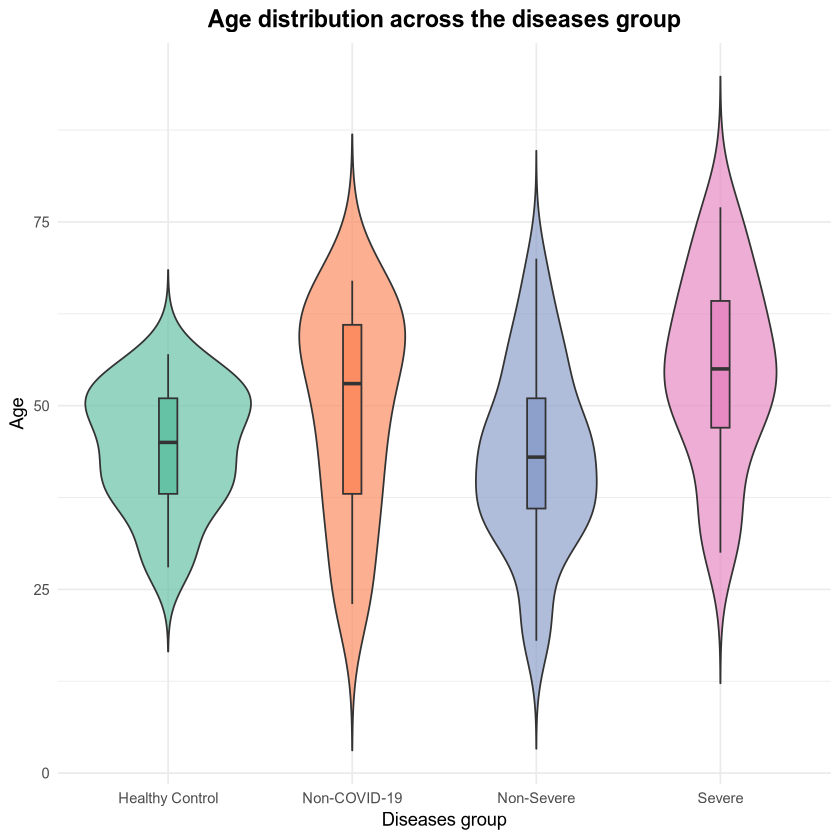

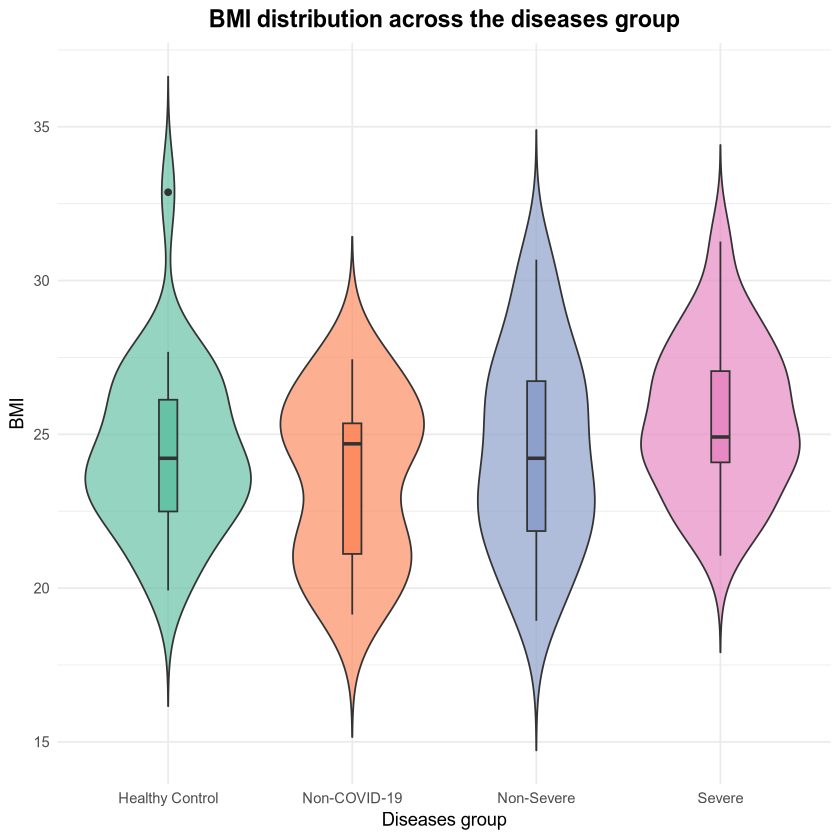

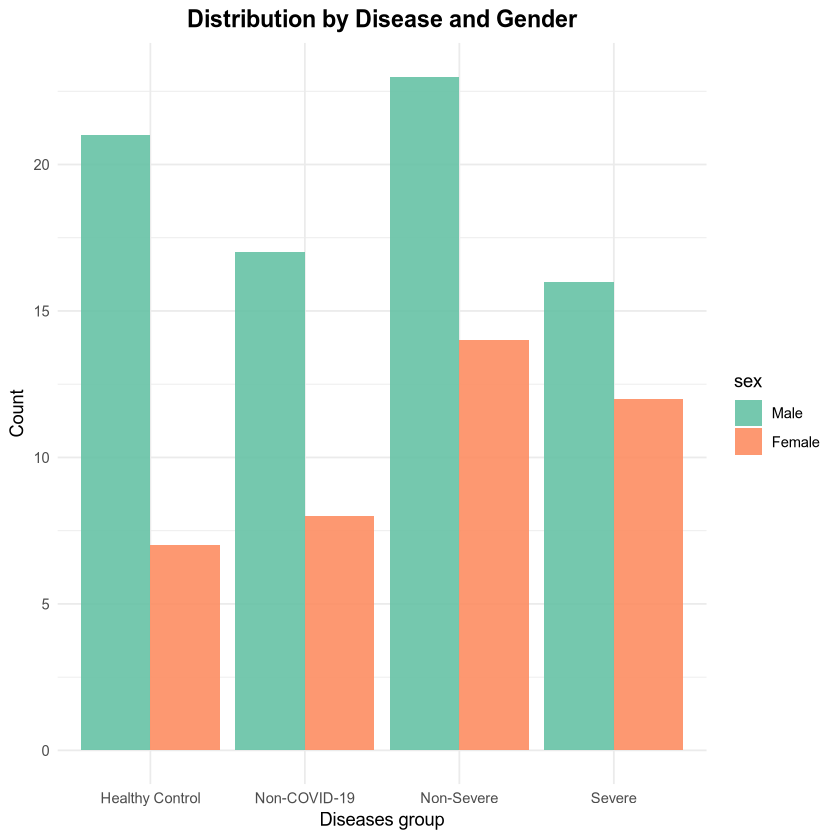

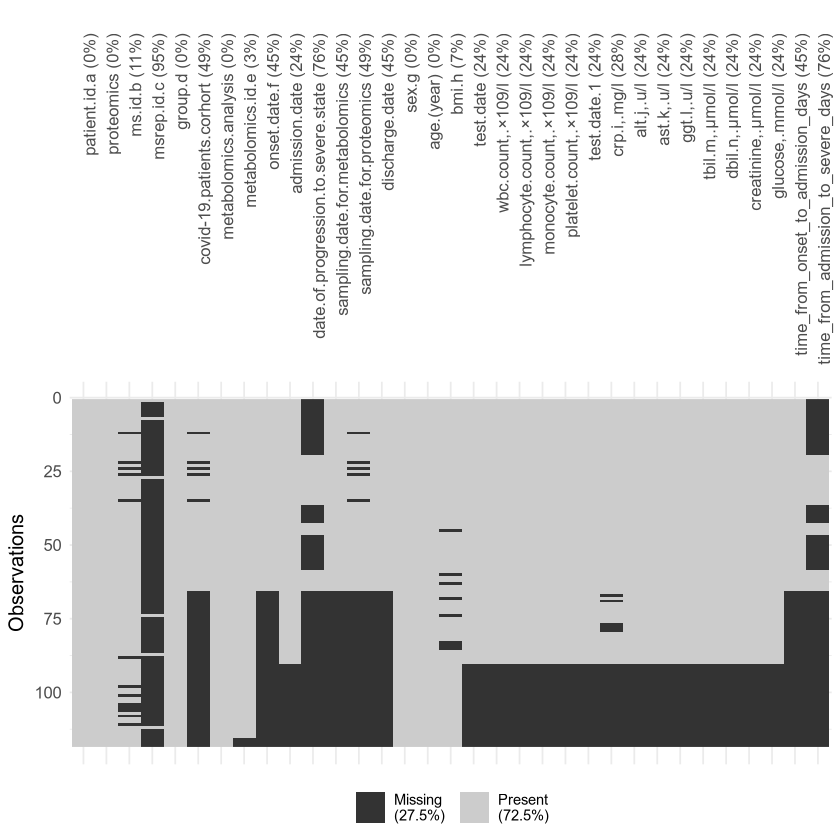

In [ ]:
library(psych)
library(knitr)
library(kableExtra)
library(dplyr)
library(ggplot2)
library(naniar)




#descriptive statistics

numeric_variables <- table_1 %>% select(where(is.numeric))

numeric_descriptive_table <- psych::describe(numeric_variables)

kable(numeric_descriptive_table, digits = 2, caption = "Descriptive Statistics of Numeric Variables") %>%
  kable_styling(full_width = FALSE, position = "center")

categorical_variables <- table_1 %>% select(where(is.factor))
categorical_descriptive_table <- lapply(categorical_variables, table)

summary(categorical_descriptive_table)
#graph 1
table_1 %>% ggplot(aes(x= group.d , y= `age.(year)`, fill = group.d)) + geom_violin(alpha = 0.7, trim = FALSE) + geom_boxplot(width = 0.1) +
  scale_fill_brewer(palette = "Set2") + theme_minimal() + labs(title = "Age distribution across the diseases group", 
                                                               x = "Diseases group",
                                                               y = "Age") + theme(legend.position = "none", 
                                                               plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

#graph 2
table_1 %>% ggplot(aes(x= group.d , y= bmi.h, fill = group.d)) + geom_violin(alpha = 0.7, trim = FALSE) + geom_boxplot(width = 0.1) +
  scale_fill_brewer(palette = "Set2") + theme_minimal() + labs(title = "BMI distribution across the diseases group", 
                                                               x = "Diseases group",
                                                               y = "BMI") + theme(legend.position = "none", 
                                                               plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

#graph 3
table_1 %>% ggplot(aes(x = group.d, fill = sex.g)) + geom_bar(position = "dodge", alpha = 0.9) + scale_fill_brewer(palette = "Set2", name = "sex") +
  theme_minimal() + labs(title = "Distribution by Disease and Gender", x = "Diseases group", y = "Count", fill= "sex" ) + 
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

#graph 4
miss_table_1 <- vis_miss(table_1)
miss_table_1 + theme(
  axis.text.x = element_text(angle = 90, hjust = 1, vjust = 1, size = 10),
  axis.text.y = element_text(size = 10),
  axis.title = element_text(size = 12),
  plot.margin = margin(5, 5, 5, 5)  # top, right, bottom, left
)


## Exercise 2.1


Adjuntando el paquete: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:table1’:

    label, label<-, units


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


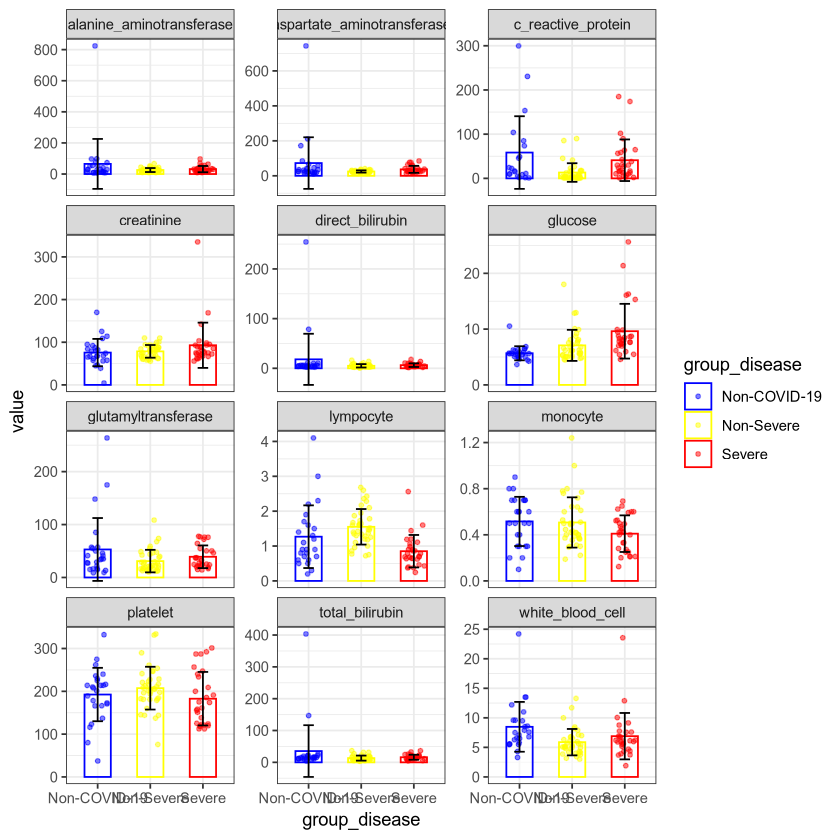

In [76]:
library(Hmisc)

table_clinical <- table_1 %>%  select(group_disease = `group.d`,
                                      white_blood_cell = `wbc.count,.×109/l`,
                                      lympocyte = `lymphocyte.count,.×109/l`,
                                      monocyte = `monocyte.count,.×109/l`,
                                      platelet = `platelet.count,.×109/l`,
                                      c_reactive_protein = `crp.i,.mg/l`,
                                      alanine_aminotransferase = `alt.j,.u/l`,
                                      aspartate_aminotransferase = `ast.k,.u/l`,
                                      glutamyltransferase = `ggt.l,.u/l`,
                                      total_bilirubin = `tbil.m,.μmol/l`,
                                      direct_bilirubin = `dbil.n,.μmol/l`,
                                      creatinine = `creatinine,.μmol/l`,
                                      glucose = `glucose,.mmol/l`) %>% filter(group_disease %in% c('Non-COVID-19','Non-Severe', 'Severe'))


table_long <- table_clinical %>%
  pivot_longer(
    cols = -group_disease, #- se usa para elegir todas las columnas, excepto el que va después del signo
    names_to = "parameter",
    values_to = "value"
  )


table_long %>% 
  ggplot(aes(x = group_disease, y = value, fill = group_disease)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", aes(color = group_disease), alpha = 0.5, width = 0.5) + 
  geom_point(position = position_jitter(width = 0.2), aes(color = group_disease), alpha = 0.5, size = 1) + 
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
               geom = "errorbar", width = 0.2, position = position_dodge(0.9)) + 
  facet_wrap(~ parameter, scales = "free_y", ncol = 3) + 
  scale_fill_manual(values = c("white", "white", "white")) +  
  scale_color_manual(values = c("blue", "yellow", "red")) + theme_bw()


## Exercise 2.2 -Remove outlayers

In [ ]:
library(outliers)
# After seeing the data, we conclude that we are going to impute the third quartil to the outliers. The reason is that we don't have a larger n (we cannot remove a lot of values) and some data is realted with several COVID states.

#Defining the function and imputing
impute_outliers_Q3 <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_val <- Q3 - Q1
  upper <- Q3 + 1.5 * IQR_val
  
  x[x > upper] <- Q3
  return(x)
}
vars_clinicas <- c(
  "white_blood_cell",
  "lympocyte",
  "monocyte",
  "platelet",
  "c_reactive_protein",
  "alanine_aminotransferase",
  "aspartate_aminotransferase",
  "glutamyltransferase",
  "total_bilirubin",
  "direct_bilirubin",
  "creatinine",
  "glucose"
)

table_clinical_imputed <- table_clinical

for (v in vars_clinicas) {
  table_clinical_imputed[[v]] <- impute_outliers_Q3(
    table_clinical[[v]]
  )
}

table_long_imputed <- table_clinical_imputed %>%
  pivot_longer(
    cols = -group_disease, #- se usa para elegir todas las columnas, excepto el que va después del signo
    names_to = "parameter",
    values_to = "value"
  )


table_long_imputed %>% 
  ggplot(aes(x = group_disease, y = value, fill = group_disease)) +
  stat_summary(fun = mean, geom = "bar", position = "dodge", aes(color = group_disease), alpha = 0.5, width = 0.5) + 
  geom_point(position = position_jitter(width = 0.2), aes(color = group_disease), alpha = 0.5, size = 1) + 
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
               geom = "errorbar", width = 0.2, position = position_dodge(0.9)) + 
  facet_wrap(~ parameter, scales = "free_y", ncol = 3) + 
  scale_fill_manual(values = c("white", "white", "white")) +  
  scale_color_manual(values = c("blue", "yellow", "red")) + theme_bw()



# Several clinical variables showed right-skewed distributions with extremely high values, especially for inflammatory and liver biomarkers. 
# Since these extreme values may reflect real severe cases rather than measurement errors, observations were not removed.

# Outliers were identified using the interquartile range (IQR) method, defining extreme values as those above Q3 +1.5 (IQR).
# Instead of removing them, outliers were imputed by replacing their values with the third quartile (Q3). 
# This conservative approach limits the influence of extreme values while preserving sample size and overall data structure.
# After outlier handling, Supplementary Figure 1 shows reduced variability and less influence of extreme values on the scale of the plot. 
# The median and overall trends across disease groups remain similar, but group comparisons become clearer. 
# This indicates that extreme values mainly affected dispersion rather than the central tendency of the data.




In [ ]:
summary(table_clinical)
summary(table_clinical_imputed)

## Exercise 3

In [ ]:

table_clinical_heatmap <- table_1 %>%  select(group_disease = `group.d`,
                                      gender = `sex.g` ,
                                      white_blood_cell = `wbc.count,.×109/l`,
                                      lympocyte = `lymphocyte.count,.×109/l`,
                                      monocyte = `monocyte.count,.×109/l`,
                                      platelet = `platelet.count,.×109/l`,
                                      c_reactive_protein = `crp.i,.mg/l`,
                                      alanine_aminotransferase = `alt.j,.u/l`,
                                      aspartate_aminotransferase = `ast.k,.u/l`,
                                      glutamyltransferase = `ggt.l,.u/l`,
                                      total_bilirubin = `tbil.m,.μmol/l`,
                                      direct_bilirubin = `dbil.n,.μmol/l`,
                                      creatinine = `creatinine,.μmol/l`,
                                      glucose = `glucose,.mmol/l`) %>% filter(group_disease %in% c("Non-COVID-19","Non-Severe", "Severe"))






table_clinical_heatmap_imputed <- table_clinical_heatmap

for (v in vars_clinicas) {
  table_clinical_heatmap_imputed[[v]] <- impute_outliers_Q3(
    table_clinical_heatmap[[v]]
  )
}


table_clinical_heatmap_imputed$gender <- as.factor(table_clinical_heatmap_imputed$gender)
table_clinical_heatmap_imputed$group_disease <- factor(
  table_clinical_heatmap_imputed$group_disease,
  levels = c("Non-COVID-19","Non-Severe", "Severe")
)

 

#Selecting the variables
biomarkers <- c(
  "white_blood_cell",
  "lympocyte",
  "monocyte",
  "platelet",
  "c_reactive_protein",
  "alanine_aminotransferase",
  "aspartate_aminotransferase",
  "glutamyltransferase",
  "total_bilirubin",
  "direct_bilirubin",
  "creatinine",
  "glucose"
)
#Filtering the NA values
for (v in biomarkers) {
  table_clinical_heatmap_imputed[[v]][
    is.na(table_clinical_heatmap_imputed[[v]])
  ] <- median(table_clinical_heatmap_imputed[[v]], na.rm = TRUE)
}




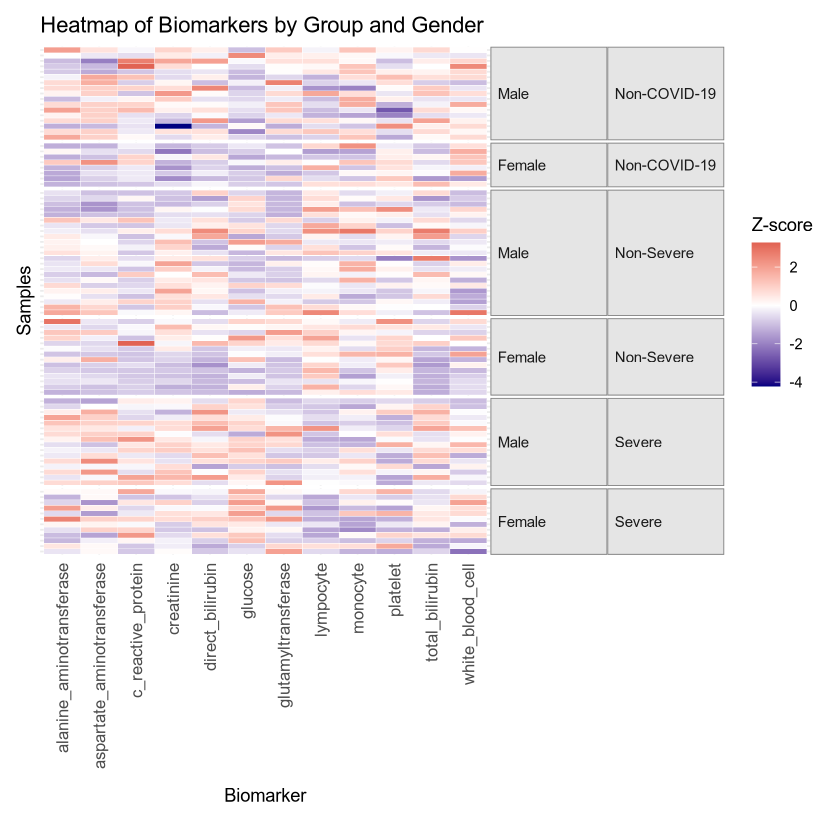

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)

# Data preparation
heatmap_data_long <- table_clinical_heatmap_imputed %>%
  mutate(sample_id = row_number()) %>%
  pivot_longer(
    cols = all_of(biomarkers),
    names_to = "biomarker",
    values_to = "value"
  ) %>%
  group_by(biomarker) %>%
  mutate(z_score = scale(value)[,1]) %>%
  ungroup()

# Heatmap 
ggplot(heatmap_data_long, aes(x = biomarker, y = factor(sample_id), fill = z_score)) +
  geom_tile(color = "white", linewidth = 0.1) +
  scale_fill_gradient2(
    low = "navy", 
    mid = "white", 
    high = "firebrick3", 
    midpoint = 0, 
    name = "Z-score"
  ) +
  facet_grid(group_disease + gender ~ ., scales = "free_y", space = "free_y") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 10),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    strip.text.y = element_text(angle = 0, hjust = 0, size = 9),
    strip.background = element_rect(fill = "grey90", color = "grey50"),
    panel.spacing = unit(0.1, "lines"),
    plot.margin = margin(10, 10, 20, 10)
  ) +
  labs(
    x = "Biomarker", 
    y = "Samples", 
    title = "Heatmap of Biomarkers by Group and Gender"
  )

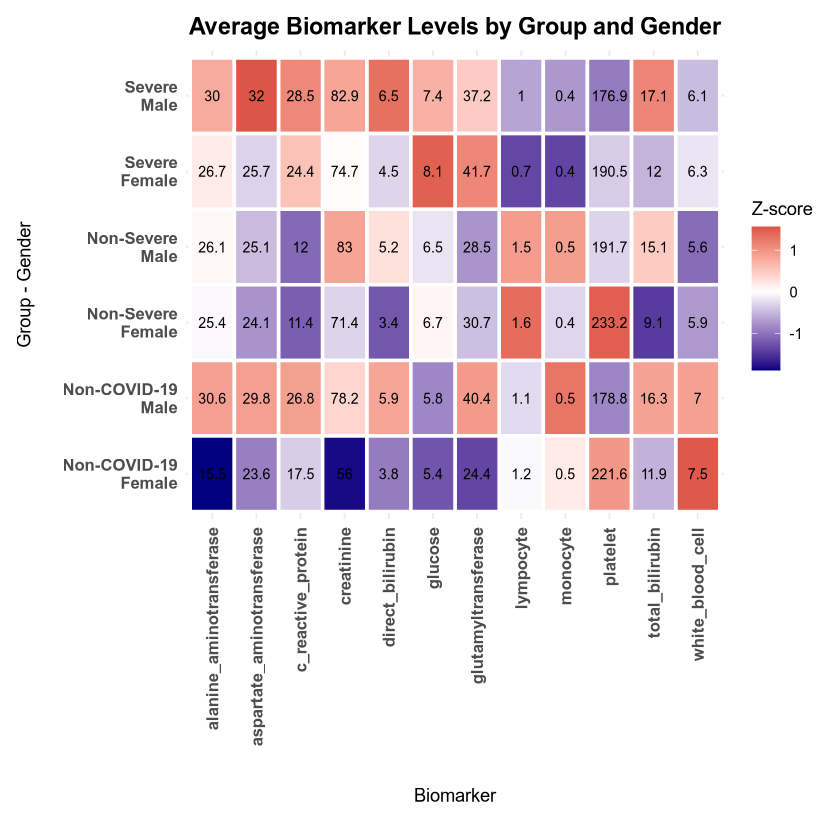

In [67]:


# Heatmap with means
heatmap_means <- table_clinical_heatmap_imputed %>%
  group_by(group_disease, gender) %>%
  summarise(across(all_of(biomarkers), mean, na.rm = TRUE), .groups = "drop") %>%
  pivot_longer(
    cols = all_of(biomarkers),
    names_to = "biomarker",
    values_to = "value"
  ) %>%
  group_by(biomarker) %>%
  mutate(z_score = scale(value)[,1]) %>%
  ungroup()

heatmap_means <- heatmap_means %>%
  mutate(group_label = paste(group_disease, gender, sep = "\n"))

ggplot(heatmap_means, aes(x = biomarker, y = group_label, fill = z_score)) +
  geom_tile(color = "white", linewidth = 1) +
  geom_text(aes(label = round(value, 1)), size = 3, color = "black") +  # Mostrar valores
  scale_fill_gradient2(
    low = "navy", 
    mid = "white", 
    high = "firebrick3", 
    midpoint = 0, 
    name = "Z-score"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 10, face = "bold"),
    axis.text.y = element_text(size = 10, face = "bold"),
    plot.margin = margin(10, 10, 20, 10),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  ) +
  labs(
    x = "\nBiomarker", 
    y = "Group - Gender\n", 
    title = "Average Biomarker Levels by Group and Gender"
  )